# Introduction 

This is a notebook where we'll try to classify different types of mosquito species prevalent in East and South Africa that is, *Anopheles gambiae s.s*, *Anopheles funestus*, *Anopheles arabiensis*  s.s means subspecies. Mosquitoes, female mosquitoes possess the Plasmodium parasites such as plasmodium falciparum. This is the causative agent of malaria which is prevalent in East Africa. Classifying this mosquitoes could potentially help us to identify breeding grounds of these mosquitoes and give us clues where they could potentially be infected by Plasmodium parasite in their salivary glands and take action to arrest the infection.

# Import

We'll need to import the data from the internet. Specifically google images with the different types of species of mosquitoes. They could look similiar because they are of the same genus but, let's see what the classifier can do.

# Preparation

Install pytorch and fast ai libraries that will give us tools to solve our problem.

In [1]:
!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
!pip install fastai
!pip install fastai --upgrade

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 578.2MB 123kB/s 
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2017.4.5 which is incompatible.
mkl-devel 2018.0.3 has requirement mkl==2018.0.3, but you'll have mkl 2019.0 which is incompatible.
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 2.2.3 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.2.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.1.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
spacy 2.0.16 has requirement regex==2018.01.10, but you'll have regex 2017.4.5 which is incompatible.
mkl-devel 2018.0.3 has requirement mkl==2018.0.3, but you'll have mkl 2019.0 which is incompatible.
menpo 0

Confirm if the fastai library is the latest. Usually greater than 1.0.x

In [2]:
!pip show fastai

Name: fastai
Version: 1.0.15
Summary: fastai makes deep learning with PyTorch faster, more accurate, and easier
Home-page: https://github.com/fastai/fastai
Author: Jeremy Howard
Author-email: info@fast.ai
License: Apache Software License 2.0
Location: /usr/local/lib/python3.6/site-packages
Requires: torchvision-nightly, numpy, scipy, cymem, thinc, dataclasses, regex, typing, nbconvert, Pillow, pyyaml, nbformat, spacy, traitlets, fastprogress, jupyter, pandas, ipython, requests, matplotlib
Required-by: 
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Next, we use magics to:
    - updates to underlying library at any point of time should be automatically reloaded/refreshed.
    - all plots from matplotlib will be displayed inside jupyter notebook instead of popping up in a new tab.
    - Import fastai library with all the modules, the cool way :)
    
Credit: notes from fastai classes Poonam Ligade

In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai import *
from fastai.vision import *

In [5]:
# defining where the images are 
path = Path('data/mosquitoes')

In [6]:
# Specifying the different classes we'll use for the job
classes = ['anopheles_arabiensis','anopheles_funestus','anopheles_gambiae']

In [ ]:
# verify if all the images of the classifier are valid 
# for c in classes:
#     print(c)
#     verify_images(path/c, delete=True, max_workers=8)

In [7]:
# Image preprocessing: changing the image to have the same dimensions and normalizing the pixel intensities
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
# How many classes do we have
data.classes

['anopheles_arabiensis', 'anopheles_funestus', 'anopheles_gambiae']

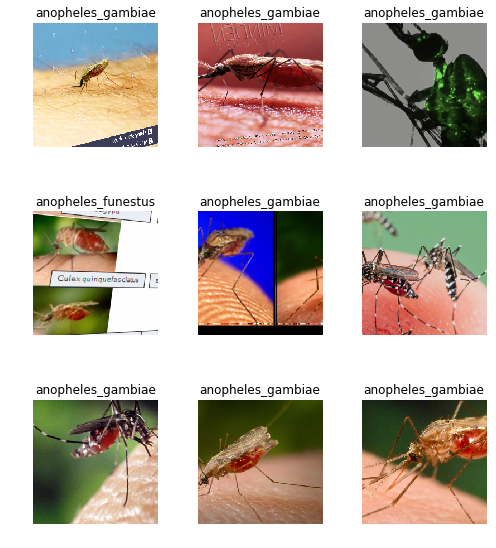

In [9]:
# see if the images were classified correctly and if the images are the correct ones.
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c

(['anopheles_arabiensis', 'anopheles_funestus', 'anopheles_gambiae'], 3)

# Train

In [11]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 49406318.51it/s]


In [12]:
learn.fit_one_cycle(4)

Total time: 00:45
epoch  train_loss  valid_loss  accuracy
1      1.424969    1.300926    0.210526  (00:13)
2      1.307760    1.356252    0.350877  (00:11)
3      1.255093    1.291440    0.456140  (00:10)
4      1.185448    1.242531    0.491228  (00:10)



In [13]:
learn.save('stage-1')

In [14]:
learn.unfreeze()

In [15]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


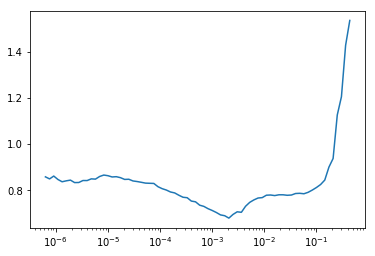

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

Total time: 00:24
epoch  train_loss  valid_loss  accuracy
1      0.923128    1.149279    0.561404  (00:13)
2      0.843351    1.222007    0.578947  (00:11)



In [18]:
learn.save('stage-2')

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

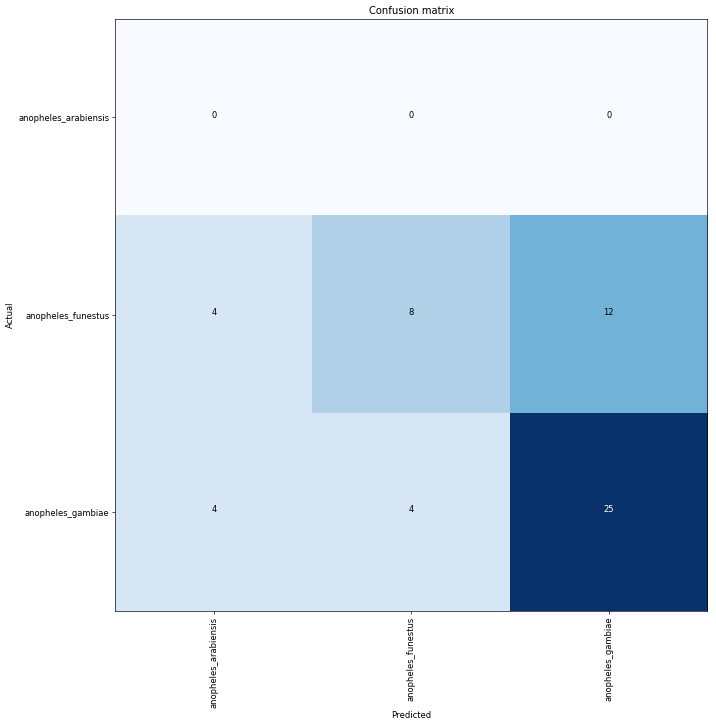

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

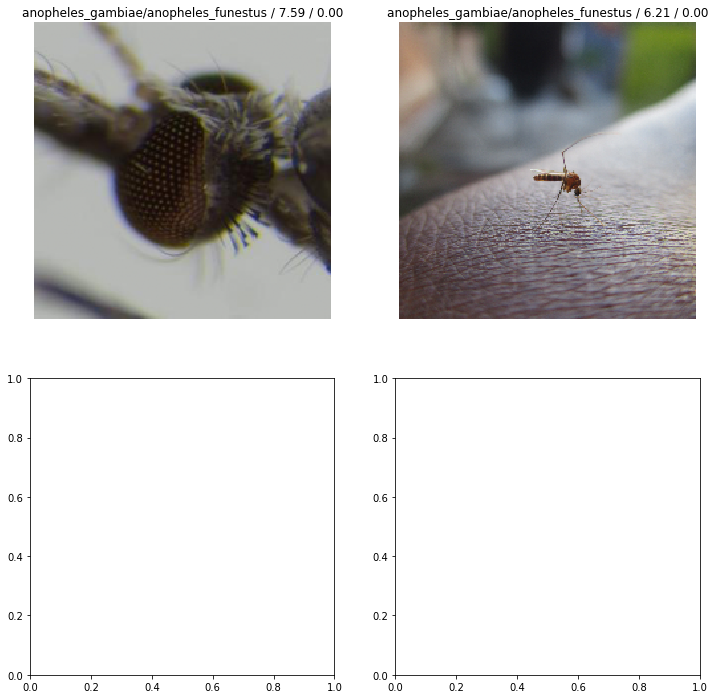

In [21]:
interp.plot_top_losses(2)

In [22]:
interp.most_confused(2)

[('anopheles_funestus', 'anopheles_gambiae', 12),
 ('anopheles_funestus', 'anopheles_arabiensis', 4),
 ('anopheles_gambiae', 'anopheles_arabiensis', 4),
 ('anopheles_gambiae', 'anopheles_funestus', 4)]